# Linear Regression


In [42]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

## 3. Nonlinear

$$f(x) = \sin(3.2x) + 0.8x$$


### 3. 生成假資料

In [43]:
x = np.linspace(0, 5, 100)
y = np.sin(3.2*x) + 0.8*x + 0.3*np.random.randn(100)

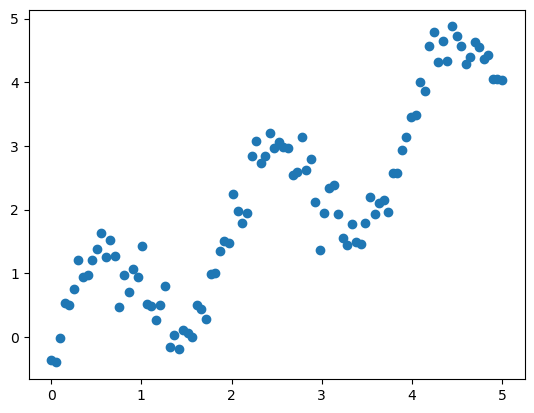

In [44]:
plt.scatter(x,y)

#### nonlinear

In [45]:
regr_lin = LinearRegression()

In [46]:
X = x.reshape(-1, 1)
print(X.shape)

(100, 1)


In [47]:
regr_lin.fit(X,y)

LinearRegression()

0.5835661924712592


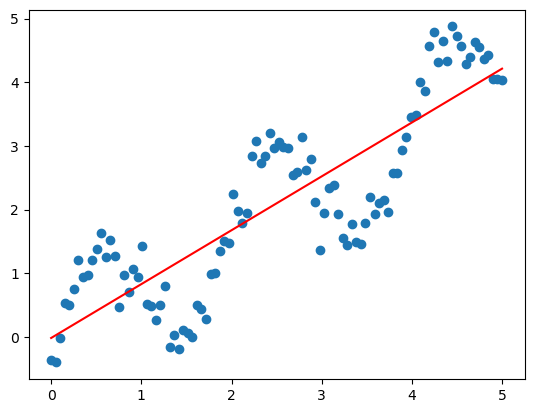

In [48]:
Y=regr_lin.predict(X)
plt.scatter(x,y)
plt.plot(x,Y , color='r')
mse = np.sum((Y-y)**2) / len(y)
print(mse)

果然超級不準, 該如何是好?

#### 多項式

多項式5次方

$$\widehat{y}=xw+b=w_{1}x_{1}+w_{2}x_{1}^{2}+w_{3}x_{1}^{3}+w_{4}x_{1}^{4}+w_{5}x_{1}^{5}+b$$

In [49]:
print(x.shape)

(100,)


In [50]:
X_poly = np.array([[k, k**2, k**3, k**4, k**5] for k in x])  # add k**6 to try it
print(X_poly.shape)

(100, 5)


In [51]:
X_poly2 = np.array([[k, k**2, k**3, k**4, k**5,k**6] for k in x])  # add k**6 to try it
print(X_poly2.shape)

(100, 6)


In [52]:
regr_poly = LinearRegression()

In [53]:
regr_poly.fit(X_poly, y)

LinearRegression()

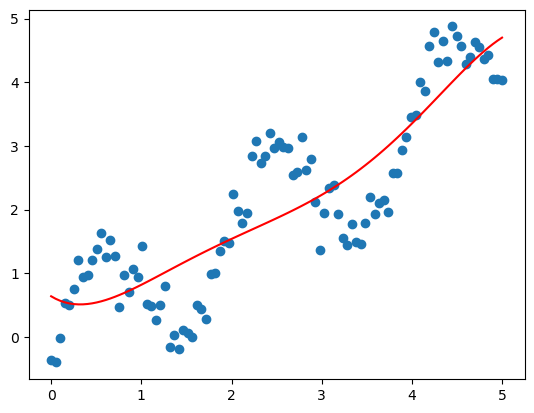

In [54]:
plt.scatter(x,y)
plt.plot(x, regr_poly.predict(X_poly), 'r')

In [55]:
print('Coefficients: ', regr_poly.coef_)
print('interception: ', regr_poly.intercept_)

Coefficients:  [-0.8706735   1.72300217 -0.84040143  0.18256663 -0.0139878 ]
interception:  0.6377583643987808


In [56]:
W=regr_poly.coef_
b=regr_poly.intercept_
np.dot(X_poly,W.T)+b

array([0.63775836, 0.59807284, 0.56654414, 0.54256475, 0.52555454,
       0.51496027, 0.51025496, 0.5109374 , 0.51653159, 0.52658616,
       0.54067384, 0.55839091, 0.57935664, 0.60321273, 0.62962278,
       0.65827173, 0.68886531, 0.72112947, 0.75480984, 0.78967122,
       0.82549694, 0.86208838, 0.89926442, 0.93686081, 0.97472974,
       1.01273916, 1.05077234, 1.08872724, 1.12651599, 1.16406435,
       1.20131113, 1.23820766, 1.27471723, 1.31081454, 1.34648515,
       1.38172492, 1.41653946, 1.45094359, 1.4849608 , 1.51862265,
       1.55196827, 1.58504377, 1.61790171, 1.65060056, 1.68320411,
       1.71578096, 1.74840392, 1.78114953, 1.81409742, 1.84732984,
       1.88093106, 1.91498683, 1.94958383, 1.98480911, 2.02074957,
       2.05749135, 2.09511935, 2.13371662, 2.17336383, 2.21413873,
       2.25611558, 2.29936459, 2.34395142, 2.38993656, 2.43737483,
       2.48631479, 2.53679823, 2.58885959, 2.64252539, 2.69781374,
       2.75473372, 2.81328488, 2.87345667, 2.93522786, 2.99856

In [57]:
regr_poly.predict(X_poly)

array([0.63775836, 0.59807284, 0.56654414, 0.54256475, 0.52555454,
       0.51496027, 0.51025496, 0.5109374 , 0.51653159, 0.52658616,
       0.54067384, 0.55839091, 0.57935664, 0.60321273, 0.62962278,
       0.65827173, 0.68886531, 0.72112947, 0.75480984, 0.78967122,
       0.82549694, 0.86208838, 0.89926442, 0.93686081, 0.97472974,
       1.01273916, 1.05077234, 1.08872724, 1.12651599, 1.16406435,
       1.20131113, 1.23820766, 1.27471723, 1.31081454, 1.34648515,
       1.38172492, 1.41653946, 1.45094359, 1.4849608 , 1.51862265,
       1.55196827, 1.58504377, 1.61790171, 1.65060056, 1.68320411,
       1.71578096, 1.74840392, 1.78114953, 1.81409742, 1.84732984,
       1.88093106, 1.91498683, 1.94958383, 1.98480911, 2.02074957,
       2.05749135, 2.09511935, 2.13371662, 2.17336383, 2.21413873,
       2.25611558, 2.29936459, 2.34395142, 2.38993656, 2.43737483,
       2.48631479, 2.53679823, 2.58885959, 2.64252539, 2.69781374,
       2.75473372, 2.81328488, 2.87345667, 2.93522786, 2.99856

In [58]:
Y=regr_poly.predict(X_poly)

mse = np.sum((Y-y)**2) / len(y)
print(mse)

0.524637789047386


#### RBF

$$\phi_i = e^{-\| x - c_i \|^2/2\sigma^2}$$

In [59]:
# normal distrubution
def RBF(x, center, sigma):
    k = np.exp(-(x - center)**2/(2*sigma**2))
    return k

In [60]:
sigma = 0.3

In [61]:
X_rbf = np.array([[RBF(k, .5, sigma), 
                  RBF(k, 1.5, sigma),
                  RBF(k, 2.5, sigma),
                  RBF(k, 3.5, sigma),
                  RBF(k, 4.5, sigma)] for k in x])



In [62]:
regr_rbf = LinearRegression()

In [63]:
regr_rbf.fit(X_rbf, y)

LinearRegression()

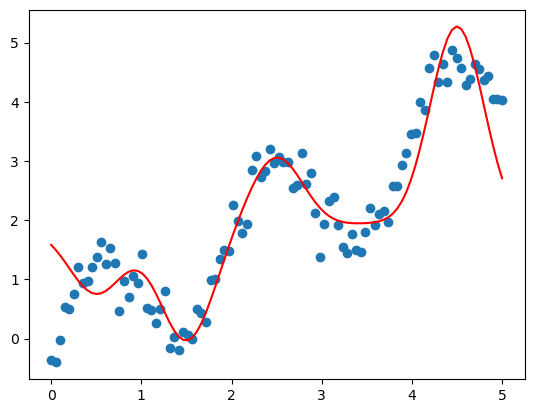

In [64]:
plt.scatter(x,y)
plt.plot(x, regr_rbf.predict(X_rbf), 'r')

In [65]:
print('Coefficients: ', regr_rbf.coef_)
print('interception: ', regr_rbf.intercept_)

Coefficients:  [-1.09506922 -1.88762846  1.20795507  0.07764072  3.4145908 ]
interception:  1.8562714539819698


#### Comparison

In [66]:
Y_lin = regr_lin.predict(X)
Y_poly = regr_poly.predict(X_poly)
Y_rbf = regr_rbf.predict(X_rbf)

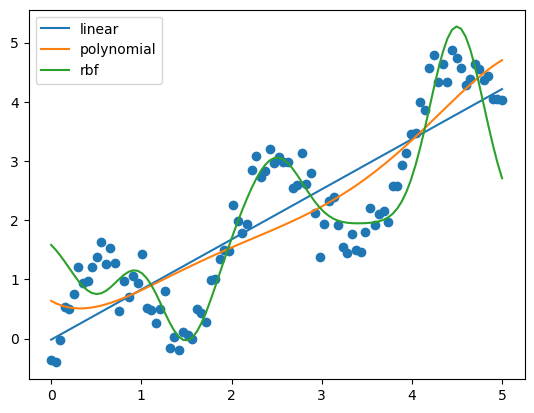

In [67]:
plt.scatter(x,y)

plt.plot(x, Y_lin, label='linear')
plt.plot(x, Y_poly, label='polynomial')
plt.plot(x, Y_rbf, label='rbf')
plt.legend()

## 請計算模型的MSE

In [68]:
print(np.sum((regr_lin.predict(X)-y)**2) / len(y))

0.5835661924712592


In [69]:
print(np.sum((regr_poly.predict(X_poly)-y)**2) / len(y))

0.524637789047386


In [70]:
print(np.sum((regr_rbf.predict(X_rbf)-y)**2) / len(y))

0.28815976793979414
